In [163]:
# Import all tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# Load data into Pandas DataFrame
data = pd.read_csv("data/Telco-Customer-Churn.csv")
customer_churn_df = pd.DataFrame(data)

# Turn TotalCharges into numeric values to reveal NaN values
customer_churn_df["TotalCharges"] = pd.to_numeric(customer_churn_df["TotalCharges"], errors="coerce")
customer_churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
customer_churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
# Drop all NaN values from TotalCharges
customer_churn_df = customer_churn.dropna(subset=["TotalCharges"])

In [29]:
customer_churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
# Remove customerID as IDs aren't useful for predictions
customer_churn_df = customer_churn_df.drop("customerID", axis=1)

In [57]:
customer_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [60]:
# Convert target column "Churn" to binary (Yes=1, No=0)
customer_churn_df["Churn"] = customer_churn_df["Churn"].map({"Yes": 1, "No": 0})
customer_churn_df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

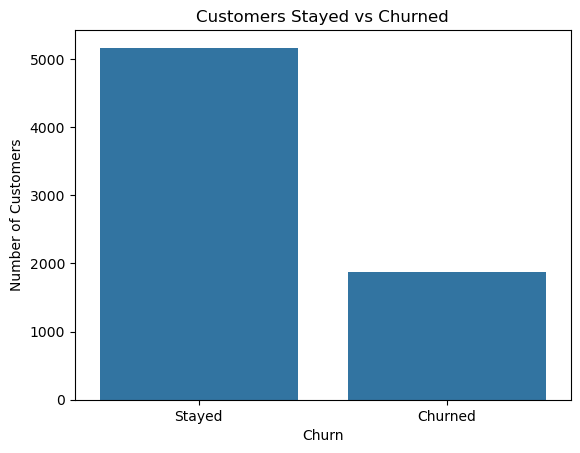

In [70]:
ax = sns.countplot(x="Churn", data=customer_churn_df)
ax.set_title("Customers Stayed vs Churned")
ax.set_ylabel("Number of Customers")
ax.set_xticks([0, 1], labels=(["Stayed", "Churned"]));

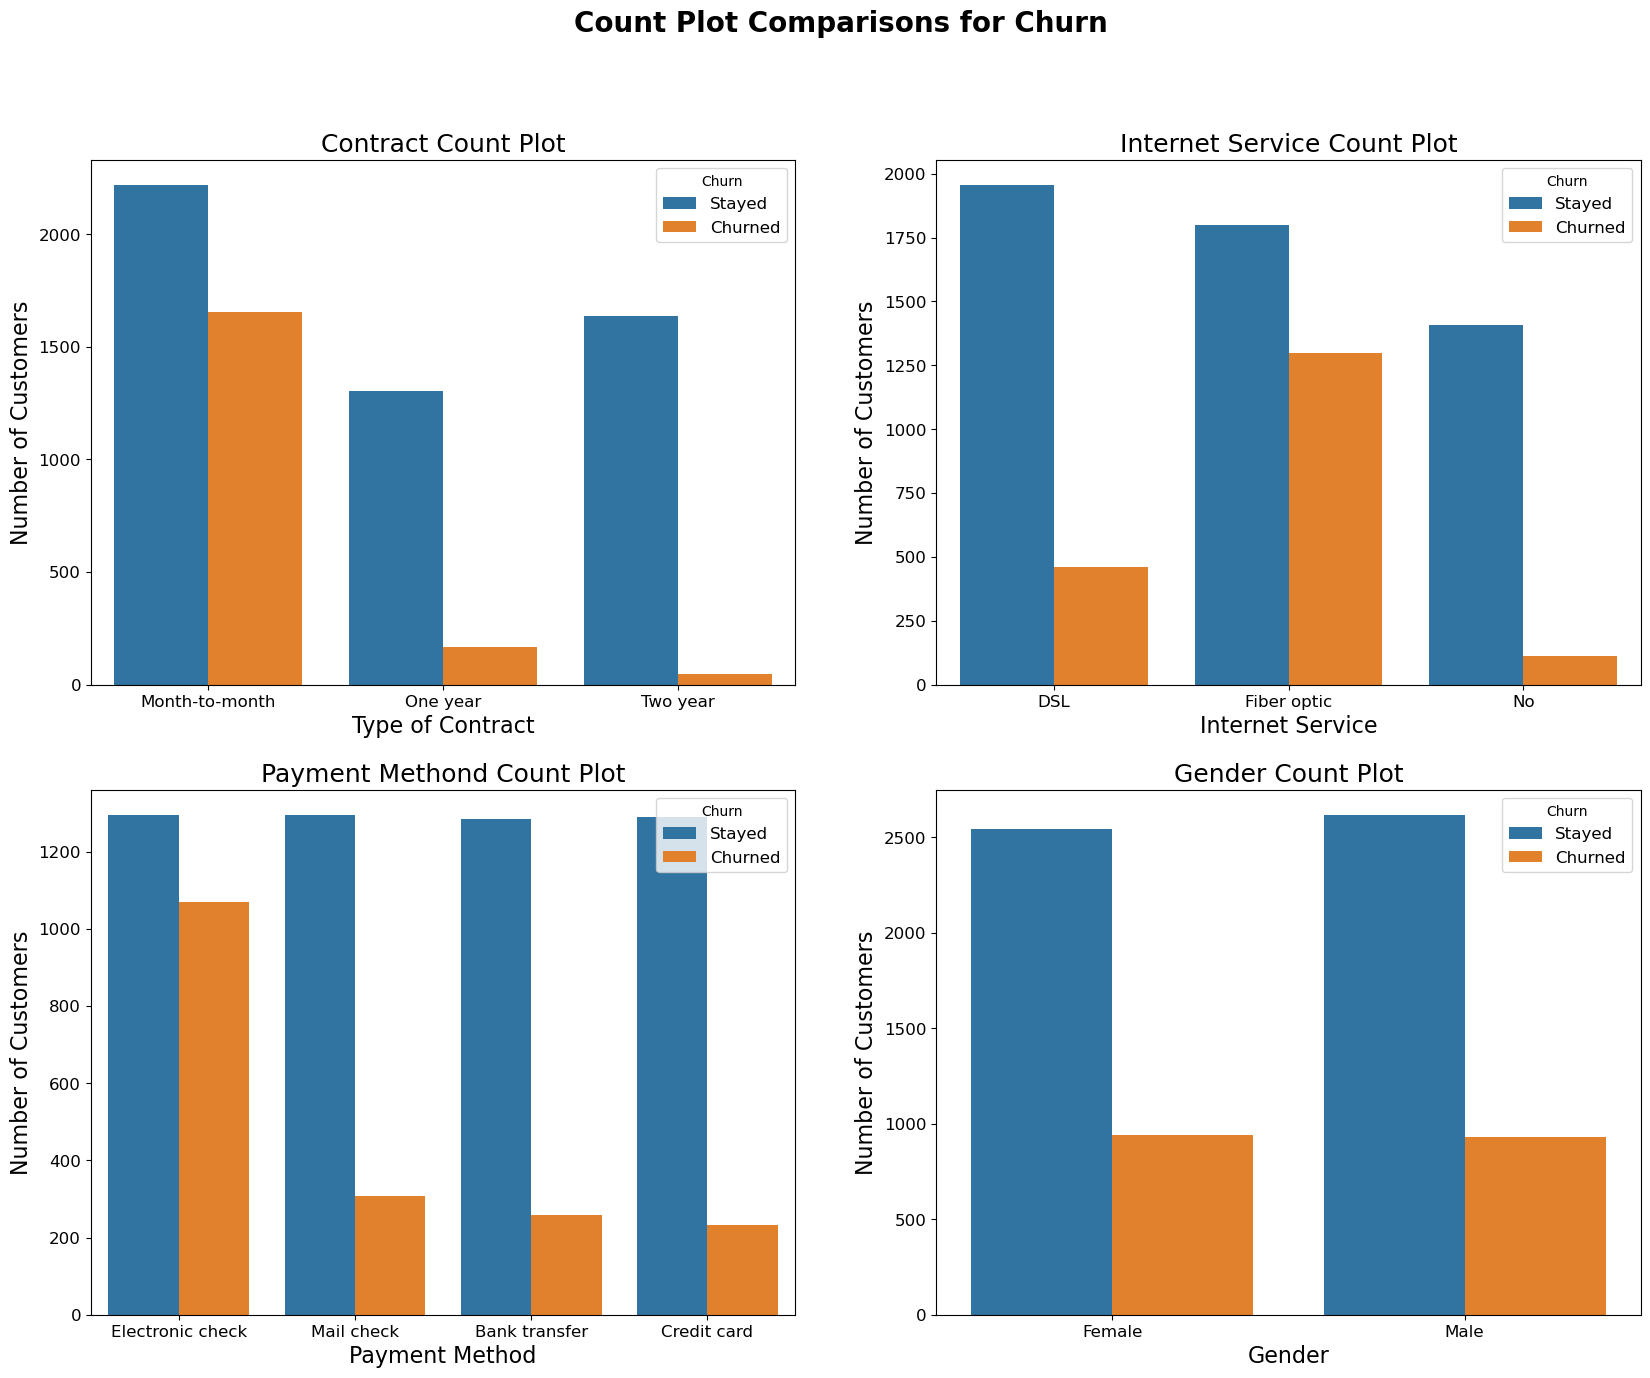

In [131]:
# Create figure with subplots for categorical comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle("Count Plot Comparisons for Churn", fontsize=20, fontweight="bold")

# Create Contract subplot
sns.countplot(x='Contract', data=customer_churn_df, hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title("Contract Count Plot", fontsize=18)
axes[0, 0].set_ylabel("Number of Customers", fontsize=16)
axes[0, 0].set_xlabel("Type of Contract", fontsize=16)
axes[0, 0].tick_params(axis="both", labelsize=12)
axes[0, 0].legend(["Stayed", "Churned"], title="Churn", fontsize=12,)

# Create InternService subplot
sns.countplot(x='InternetService', data=customer_churn_df, hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title("Internet Service Count Plot", fontsize=18)
axes[0, 1].set_ylabel("Number of Customers", fontsize=16)
axes[0, 1].set_xlabel("Internet Service", fontsize=16)
axes[0, 1].tick_params(axis="both", labelsize=12)
axes[0, 1].legend(["Stayed", "Churned"], title="Churn", fontsize=12,)

# Create PaymentMethod subplot
sns.countplot(x='PaymentMethod', data=customer_churn_df, hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title("Payment Methond Count Plot", fontsize=18)
axes[1, 0].set_ylabel("Number of Customers", fontsize=16)
axes[1, 0].set_xlabel("Payment Method", fontsize=16)
axes[1, 0].tick_params(axis="both", labelsize=12)
axes[1, 0].set_xticks([0, 1, 2, 3], labels=(["Electronic check", "Mail check", "Bank transfer", "Credit card"]))
axes[1, 0].legend(["Stayed", "Churned"], title="Churn", fontsize=12,)

# Create gender subplot
sns.countplot(x='gender', data=customer_churn_df, hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title("Gender Count Plot", fontsize=18)
axes[1, 1].set_ylabel("Number of Customers", fontsize=16)
axes[1, 1].set_xlabel("Gender", fontsize=16)
axes[1, 1].tick_params(axis="both", labelsize=12)
axes[1, 1].legend(["Stayed", "Churned"], title="Churn", fontsize=12,);

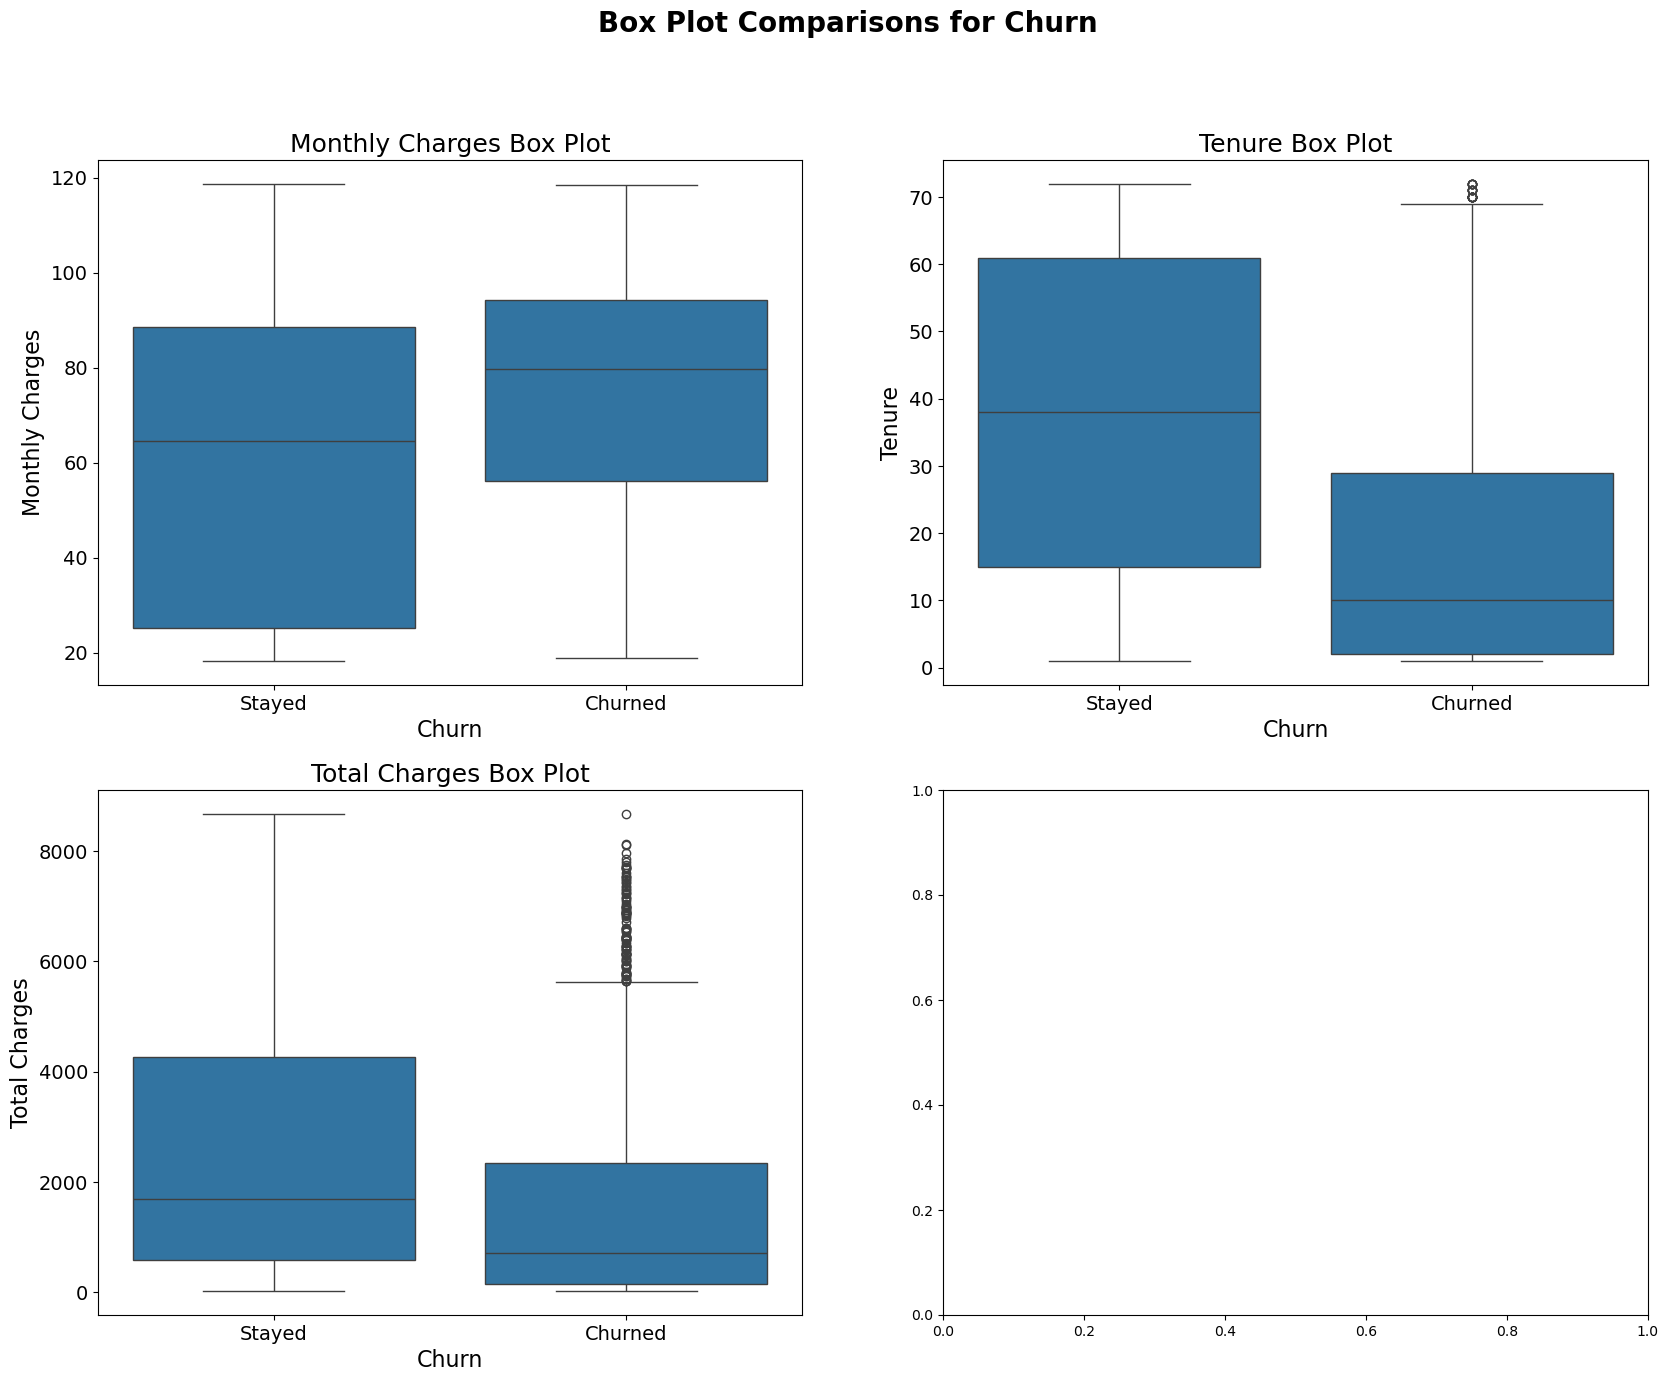

In [141]:
# Create figure with subplots for numerical comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle("Box Plot Comparisons for Churn", fontsize=20, fontweight="bold")

# Create MonthlyCharges Box Plot
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_churn_df, ax=axes[0, 0])
axes[0, 0].set_title("Monthly Charges Box Plot", fontsize=18)
axes[0, 0].set_ylabel("Monthly Charges", fontsize=16)
axes[0, 0].set_xlabel("Churn", fontsize=16)
axes[0, 0].tick_params(axis="both", labelsize=14)
axes[0, 0].set_xticks([0, 1], labels=(["Stayed", "Churned"]))

# Create tenure Box Plot
sns.boxplot(x="Churn", y="tenure", data=customer_churn_df, ax=axes[0, 1])
axes[0, 1].set_title("Tenure Box Plot", fontsize=18)
axes[0, 1].set_ylabel("Tenure", fontsize=16)
axes[0, 1].set_xlabel("Churn", fontsize=16)
axes[0, 1].tick_params(axis="both", labelsize=14)
axes[0, 1].set_xticks([0, 1], labels=(["Stayed", "Churned"]))

# Create TotalCharges Box Plot
sns.boxplot(x="Churn", y="TotalCharges", data=customer_churn_df, ax=axes[1, 0])
axes[1, 0].set_title("Total Charges Box Plot", fontsize=18)
axes[1, 0].set_ylabel("Total Charges", fontsize=16)
axes[1, 0].set_xlabel("Churn", fontsize=16)
axes[1, 0].tick_params(axis="both", labelsize=14)
axes[1, 0].set_xticks([0, 1], labels=(["Stayed", "Churned"]));

In [ ]:
categorical_features = [""]

In [142]:
customer_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [153]:
# Define X and y
X = customer_churn_df.drop("Churn", axis=1)
y = customer_churn_df["Churn"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Define numeric and categorical features
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]
categorical_features = customer_churn_df.select_dtypes(include=["object"]).columns.tolist()

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])

In [155]:
# Create LogisticRegression model
lr_model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", LogisticRegression())])

# Create Random Forest model
rf_model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestClassifier())])

In [158]:
lr_model_score = cross_val_score(lr_model, X_train, y_train, cv=5, scoring="f1")
print(f"Logistic Regression model F1 score (mean): {lr_model_score.mean():.2f}")

rf_model_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="f1")
print(f"Random Forest model F1 score (mean): {rf_model_score.mean():.2f}")

Logistic Regression model F1 score (mean): 0.61
Random Forest model F1 score (mean): 0.56


In [159]:
# Train the Logistic Regression model on the entire training set
final_model = lr_model.fit(X_train, y_train)

In [160]:
# Test the model on the test set
final_predictions = final_model.predict(X_test)
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



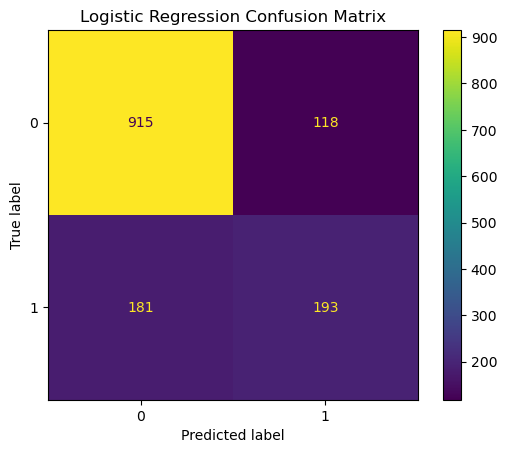

In [177]:
# Create confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=final_predictions,
)
plt.title("Logistic Regression Confusion Matrix");